### 导入工具库

matplotlib和seaborn是Python绘图工具，pandas和numpy是矩阵运算工具。

此段代码只是引入Python包，无回显（代码执行输出）。

In [110]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os
warnings.filterwarnings("ignore")

### 数据读取
使用pandas.read_excel(filepath)方法读取notebook中的数据文件。
* filepath：数据文件路径

In [111]:
df = pd.read_csv('data/Mall_Customers.csv')

### 展示样本数据

执行这段代码可以看到数据集的5个样本数据

In [112]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


执行这段代码可以看到数据集的维度

In [113]:
df.shape

(200, 5)

### 展示各个字段的统计值信息

调用pandas.DataFrame.describe方法，可以看到各个特征的统计信息，包括样本数、均值、标准差、最小值、1/4分位数、1/2分位数、3/4分位数和最大值。

In [114]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### 展示各个字段的数据类型

pandas.DataFrame.dtypes()方法可以展示各个字段的类型信息。

可以看到每个字段的类型信息。

In [115]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

查看是否有数据缺失，如果有，则需要填补。

实验中使用的这份数据很完善，没有任何一个属性的值为null，因此统计下来，null值的数量都是0

In [116]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 展示主要属性的数量分布

这段代码使用matplotlib绘制了数据中三个主要属性的统计直方图，包含年龄、收入、消费指数。

可以看到三张统计直方图，形状都与正态分布类似，说明数据量足够，数据抽样的分布也比较理想。

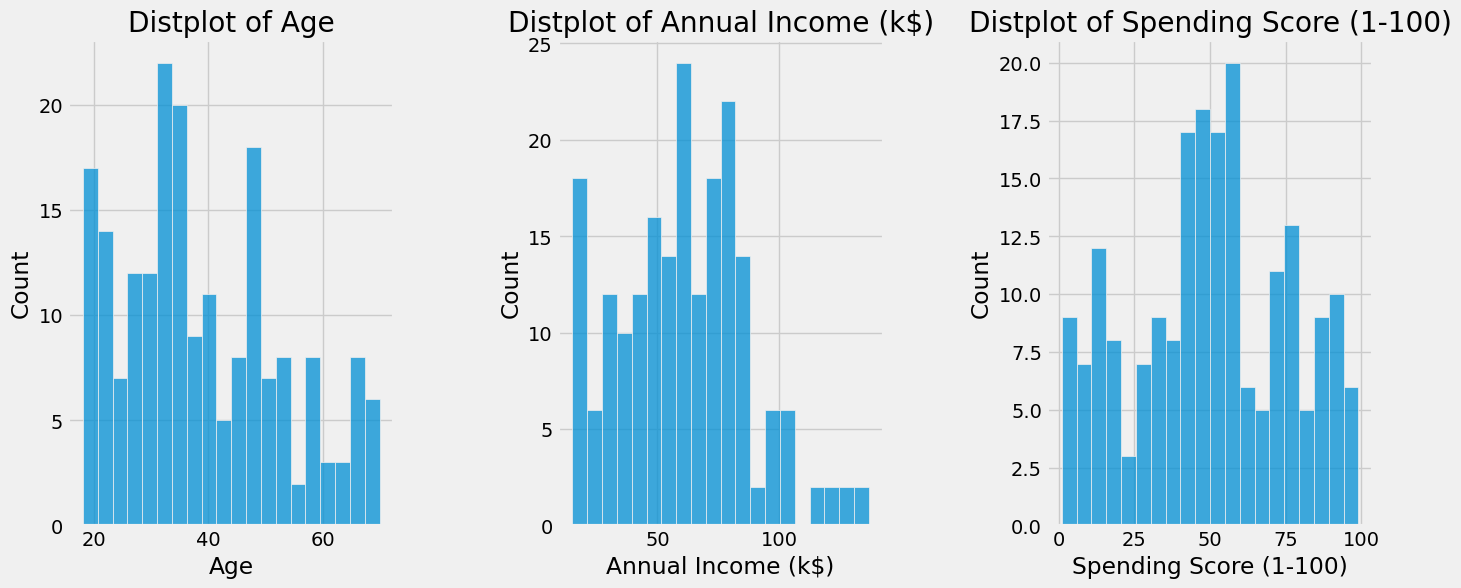

In [117]:
plt.style.use('fivethirtyeight')
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.histplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

### 展示男、女客户数量的分布

这段代码使用matplotlib绘制条状图，展示男、女样本数量的分布。

可以看到一张条状图。

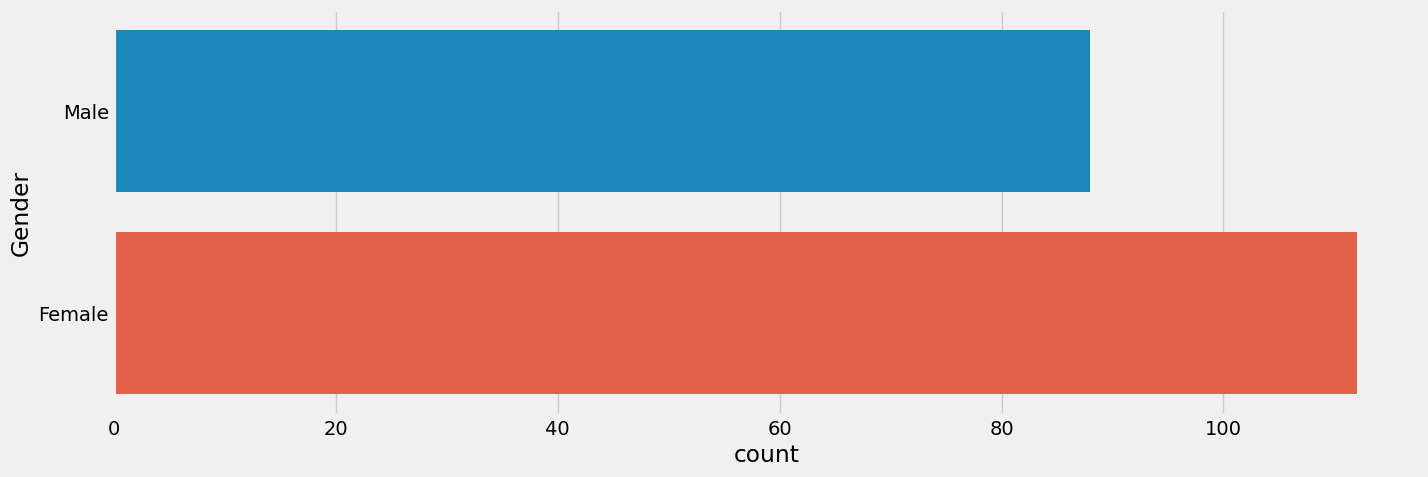

In [118]:
plt.figure(1 , figsize = (15 , 5))
sns.countplot(y = 'Gender' , data = df)
plt.show()

### 观察不同属性之间的关系

展示任意两个属性之间的统计关系图。

此段代码执行后，会有9张统计图，展示了任意两个属性之间的统计关系。

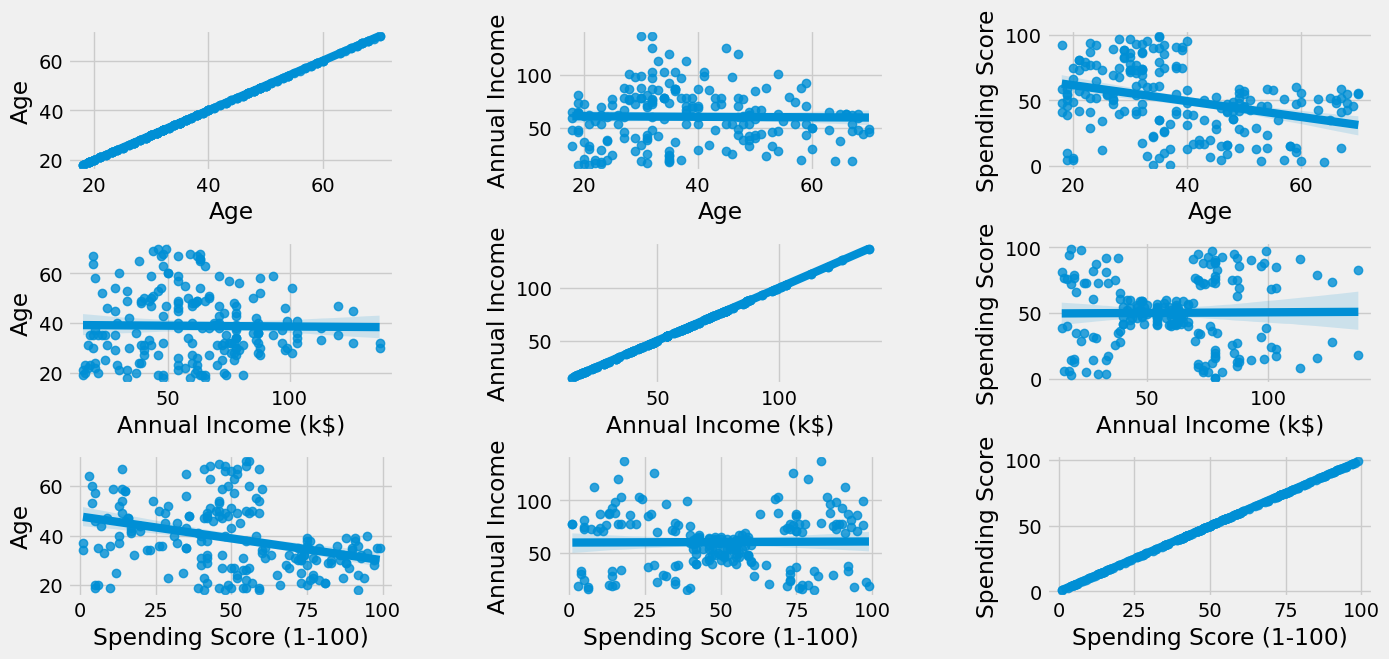

In [119]:
plt.figure(1 , figsize = (15 , 7))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

此段代码执行后，会有1张统计图，以性别为参照，展示了年龄和收入之间的对应统计关系

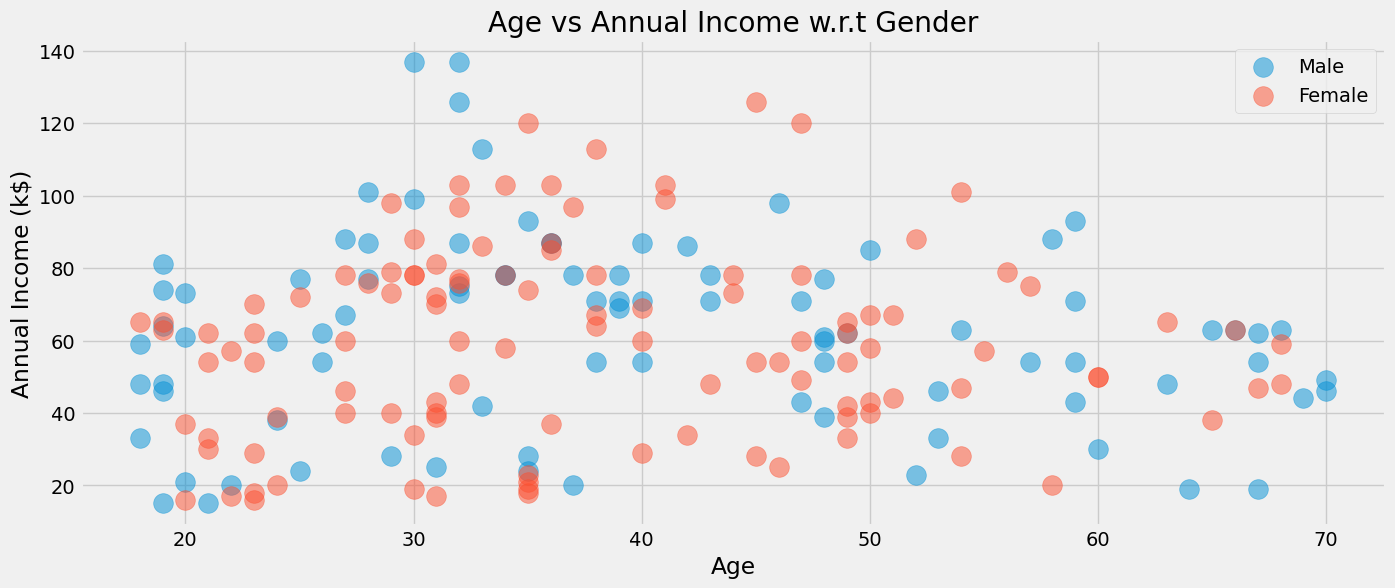

In [120]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Age' , y = 'Annual Income (k$)' , data = df[df['Gender'] == gender] ,
                s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)') 
plt.title('Age vs Annual Income w.r.t Gender')
plt.legend()
plt.show()

此段代码执行后，会有1张统计图，以性别为参照，展示了收入和消费指数之间的对应统计关系

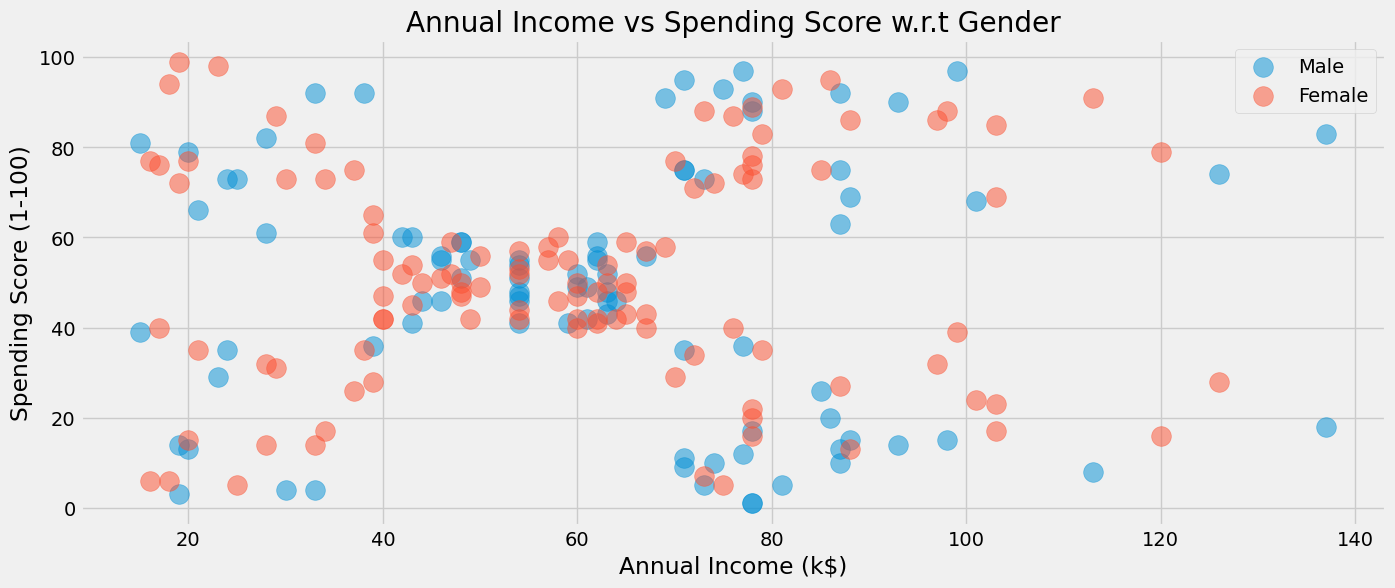

In [121]:
plt.figure(1 , figsize = (15 , 6))
for gender in ['Male' , 'Female']:
    plt.scatter(x = 'Annual Income (k$)',y = 'Spending Score (1-100)' ,
                data = df[df['Gender'] == gender] ,s = 200 , alpha = 0.5 , label = gender)
plt.xlabel('Annual Income (k$)'), plt.ylabel('Spending Score (1-100)') 
plt.title('Annual Income vs Spending Score w.r.t Gender')
plt.legend()
plt.show()

### 观察不同性别的客户的数据分布

观察不同性别的客户的数据，在年龄、年收入、消费指数上的分布。

此段代码执行后，会有六幅boxplot图像。

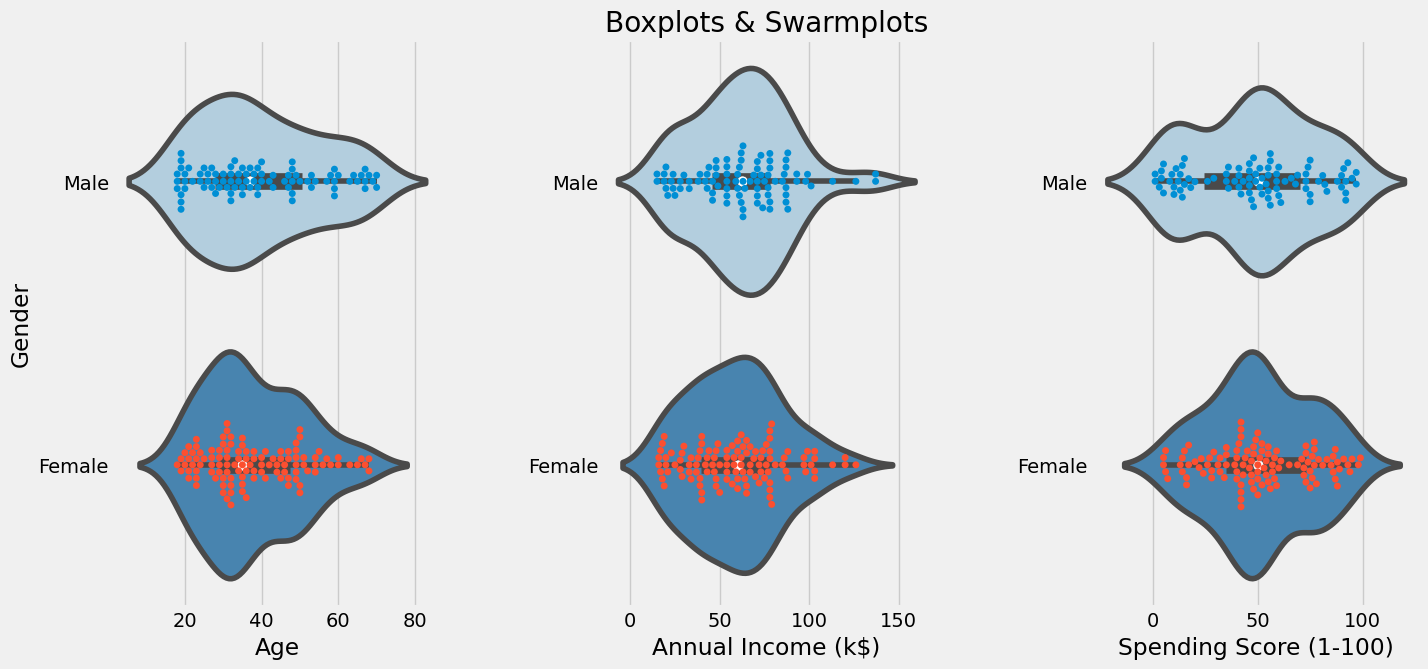

In [122]:
plt.figure(1 , figsize = (15 , 7))
n = 0 

for cols in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1 
    plt.subplot(1 , 3 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    sns.violinplot(x = cols , y = 'Gender' , data = df, palette='Blues')
    sns.swarmplot(x = cols , y = 'Gender' , data = df)
    plt.ylabel('Gender' if n == 1 else '')
    plt.title('Boxplots & Swarmplots' if n == 2 else '')
plt.show()

### 实现k-means聚类算法
请根据上面的算法和脚手架代码完成该算法，主要用于计算每个样本到k个均值间的距离。

In [123]:
import numpy as np

def kmeans(X, K, max_iters=100):
    # 随机初始化质心
    centroids = X[np.random.choice(range(X.shape[0]), K, replace=False)]
    
    for _ in range(max_iters):
        # 一个临时的距离矩阵distances，用于存储每个数据点与每个质心之间的距离,规模为X.shape[0]*K。
        #distances第i行第j列表示第i个数据点到第j个质心的距离，计算两个点x1,x2之间的距离距离可以使用np.linalg.norm（x1-x2）
        '''
        
        code here
        
        '''
        
        # 分配每个数据点到最近的质心
        labels = np.argmin(distances, axis=1)
        
        # 更新质心位置
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])
        
        # 如果质心位置不再改变，停止迭代
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# 示例用法
X = np.array([[1, 2], [1, 4], [1, 0], [4, 2], [4, 4], [4, 0]])
K = 2
labels, centroids = kmeans(X, K)
print("聚类结果：", labels)
print("质心位置：", centroids)


聚类结果： [0 0 1 0 0 1]
质心位置： [[2.5 3. ]
 [2.5 0. ]]


### 使用 K-means 对数据进行聚类

根据年龄和消费指数进行聚类和区分客户。

我们使用1-10个聚类中心进行聚类。（此段代码无输出）

In [124]:
from sklearn.cluster import KMeans

'''Age and spending Score'''
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

观察10次聚类的inertias，并以如下折线图进行统计。

inertias是K-Means模型对象的属性，它作为没有真实分类结果标签下的非监督式评估指标。表示样本到最近的聚类中心的距离总和。值越小越好，越小表示样本在类间的分布越集中。

可以看到，当聚类中心大于等于4之后，inertias的变化幅度显著缩小了。

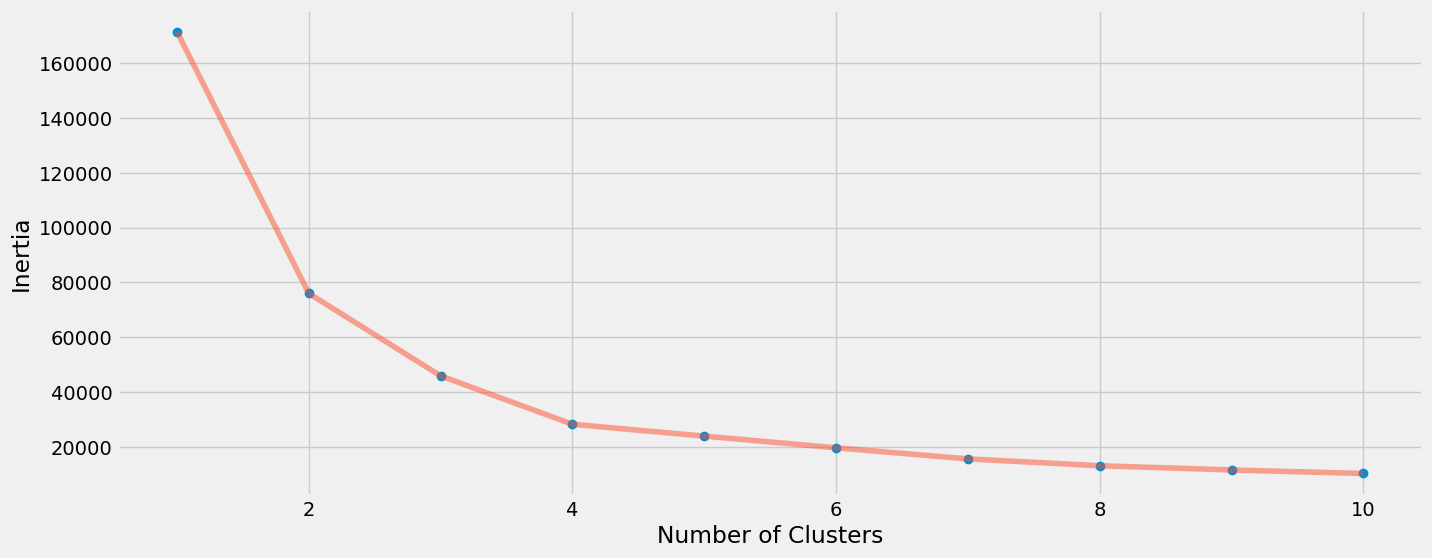

In [125]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

我们使用4个聚类中心再次进行聚类。（此段代码无输出）

In [126]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

我们把4个聚类中心的聚类结果，以下图进行展示。横坐标是年龄，纵坐标是消费指数，4个红点为4个聚类中心，4块不同颜色区域就是4个不同的用户群体。

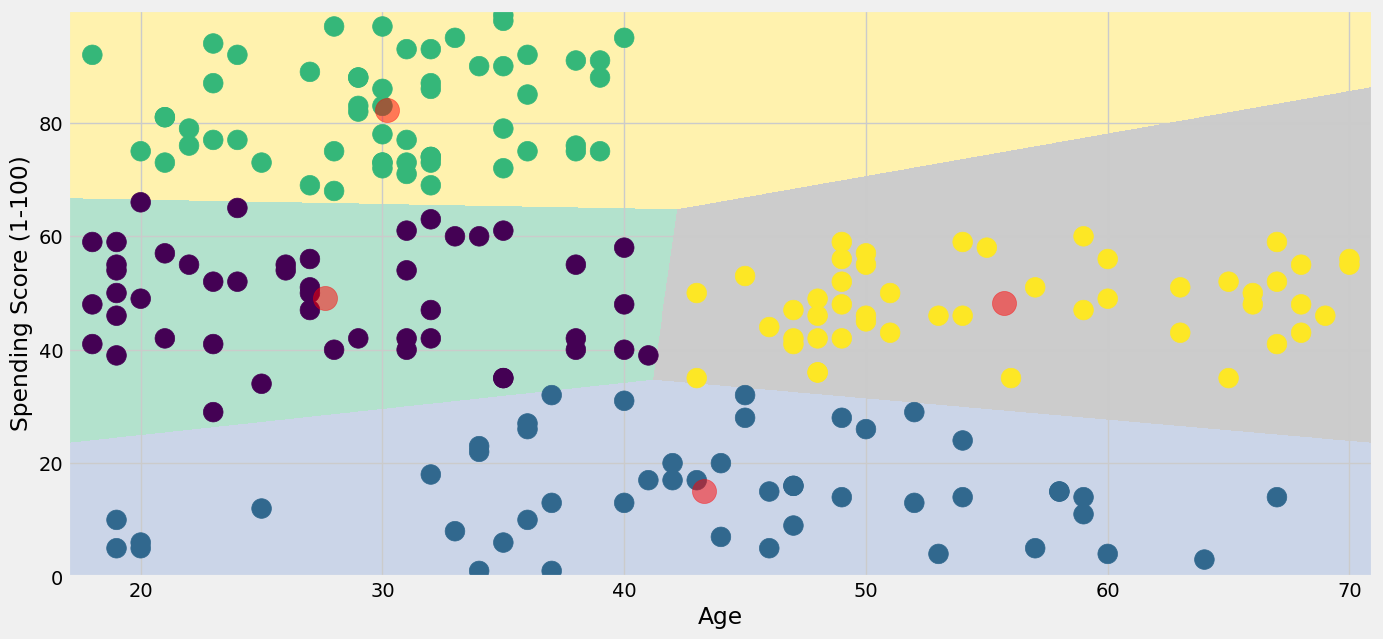

In [127]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 , 
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

根据年收入和消费指数进行聚类和区分客户。

我们使用1-10个聚类中心进行聚类。（此段代码无输出）

In [128]:
'''Annual Income and spending Score'''
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
'''

code here

'''

观察10次聚类的inertias，并以如下折线图进行统计。

可以看到，当聚类中心大于等于5之后，inertias的变化幅度显著缩小了。

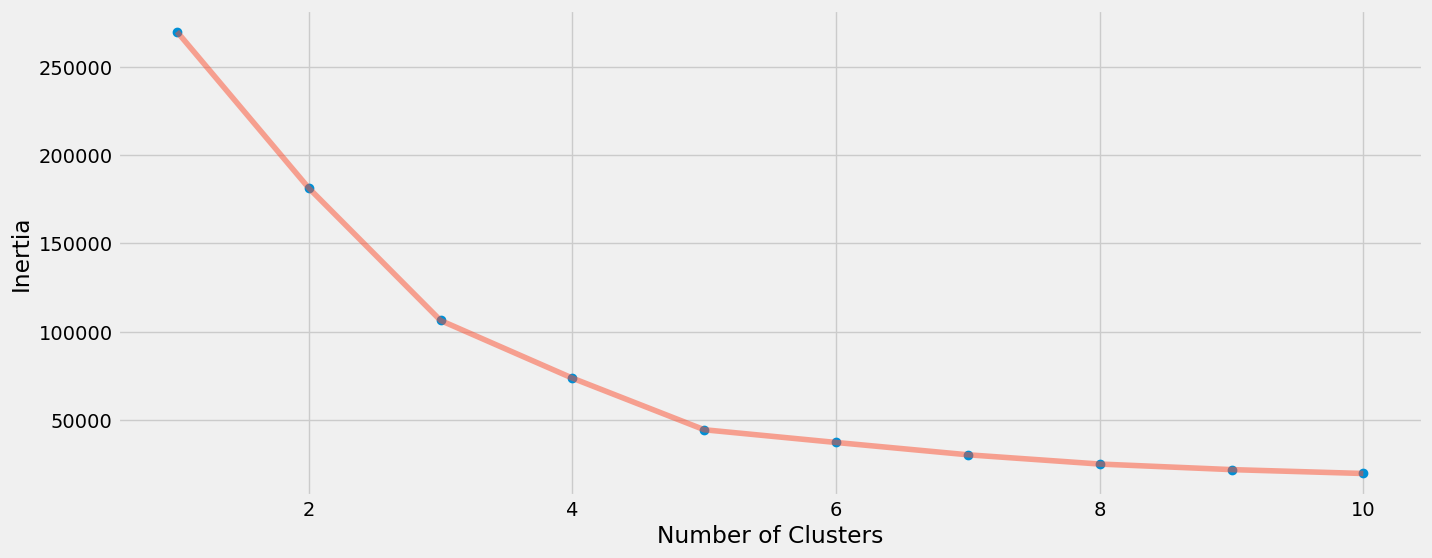

In [129]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

我们使用5个聚类中心再次进行聚类。（此段代码无输出）

In [130]:
'''

code here

'''
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

我们把5个聚类中心的聚类结果，以下图进行展示。横坐标是年收入，纵坐标是消费指数，5个红点为5个聚类中心，5块不同颜色区域就是5个不同的用户群体。

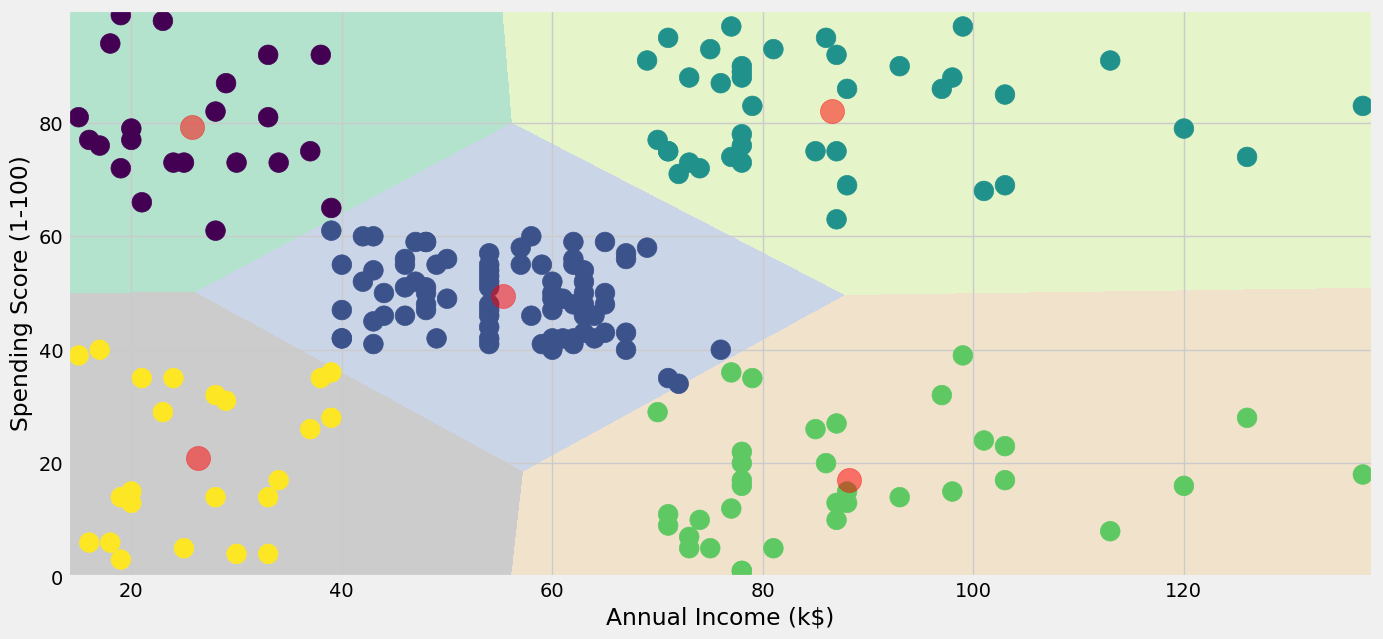

In [131]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 , 
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
fig = plt.gcf()

plt.show()

## 实验小结

本实验通过聚类分析的方法，对消费者进行了细分，区分出了不同群体存在收入和消费积分上存在一些差异，通过这些差异能够对不同的群体进行画像，从而加深对消费者的消费行为习惯的认识。